<h1>Netflix Stock Price - Linear Regression</h1>

<h3>Import Dependencies</h3>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import plotly

#from sklearn.preprocessing import MinMaxScaler
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import metrics
import pickle

<h3>Load Clean Dataset</h3>

In [22]:
dataset = pd.read_csv('netflix_clean_stock_price_dataset.csv')
pd.set_option('display.width', 100)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
dataset.sort_values(by=['date'], inplace=True, ascending=True)
print(dataset.tail())

            date        high         low        open       close
4857  2021-09-08  615.599976  595.710022  603.840027  606.049988
4858  2021-09-09  609.440002  596.549988  606.469971  597.539978
4859  2021-09-10  609.450012  593.669983  598.159973  598.719971
4860  2021-09-13  598.570007  582.780029  598.570007  589.289978
4861  2021-09-14  587.280029  575.559998  584.890015  577.760010


In [23]:
#convert data type of date
dataset.date = pd.to_datetime(dataset.date)

In [24]:
#check dataset data types
dict(dataset.dtypes)

{'date': dtype('<M8[ns]'),
 'high': dtype('float64'),
 'low': dtype('float64'),
 'open': dtype('float64'),
 'close': dtype('float64')}

In [25]:
#check shape of data type
print(list(dataset.shape))

[4862, 5]


In [27]:
#define X and Y
X = dataset.drop(['close', 'date'], axis=1)
Y = dataset['close']

In [29]:
#apply train test split 
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=123)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3403, 3)
(3403,)
(1459, 3)
(1459,)


<h3>Train Model - Linear Regression</h3>

In [30]:
#define a variable
l_model = LinearRegression()
model = l_model.fit(x_train, y_train)
print(model)

LinearRegression()


<h3>Evaluate Model - Linear Regression</h3>

In [33]:
#Check train data score of model
train_score = l_model.score(x_train, y_train)
print("Model Score:", train_score)
print("**" * 58)
print("Model Score (%) :", train_score * 100)

Model Score: 0.9998814396258047
********************************************************************************************************************
Model Score (%) : 99.98814396258047


In [34]:
#Check test data score of model
test_score = l_model.score(x_test, y_test)
print("Model Score:", test_score)
print("**" * 58)
print("Model Score (%) :", test_score * 100)

Model Score: 0.9998920509486975
********************************************************************************************************************
Model Score (%) : 99.98920509486975


In [35]:
#Try to prediction & test
y_prediction = l_model.predict(x_test)
# calculat evaluation measures: mean-square-error and r2-score
mse = metrics.mean_squared_error(y_test, y_prediction)
mae = metrics.mean_absolute_error(y_test, y_prediction)
r2 = metrics.r2_score(y_test, y_prediction)

print("##" * 58)
print('Mean squared error: ', mse)
print("##" * 58)
print('Mean absolute error: ', mae)
print("##" * 58)
print('R2 score: ', r2)
print("##" * 58)

####################################################################################################################
Mean squared error:  2.7014168253842983
####################################################################################################################
Mean absolute error:  0.6989512367041375
####################################################################################################################
R2 score:  0.9998920509486975
####################################################################################################################


In [47]:
#plot the result
test_set = pd.DataFrame(columns=['y_test','y_prediction'])
test_set['y_test'] = y_test
test_set['y_prediction'] = y_prediction.flatten()
test_set.sort_values(by=['y_test'], inplace=True, ascending=True)
test_set.head()

,y_test,y_prediction
94,0.412143,0.419217
92,0.517857,0.522444
119,0.600714,0.607226
118,0.610714,0.587072
105,0.625000,0.645018


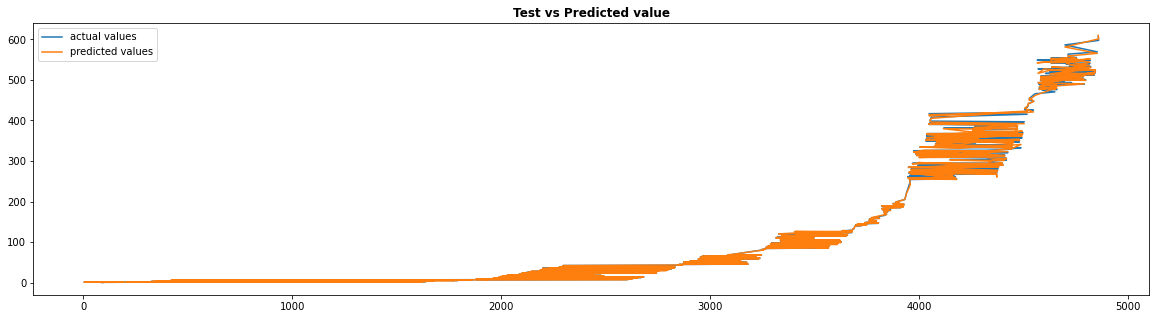

In [51]:
fig=plt.figure(figsize=(20,5))
plt.title("Test vs Predicted value", weight='bold')
plt.plot(test_set)
plt.legend(['actual values','predicted values'])
#plt.text(x=500, y=1.5,s='R2 Score : {}'.format(r2))
#plt.text(x=500, y=1.35,s='Mean Squared error : {}'.format(mse))
#plt.text(x=500, y=1.25,s='Mean Absolute error : {}'.format(mae))
plt.show()

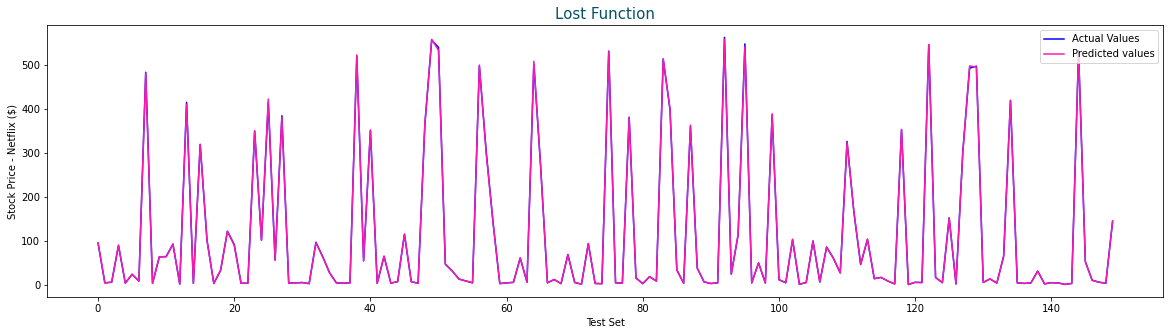

In [54]:
#set it as dataframe
prediction_values = pd.DataFrame(list(zip(y_prediction, y_test)), columns=['predicted_values',  'actual_values'])
plt.figure(figsize=(20, 5))

plt.plot(y_test[0:150].ravel(), label='Actual Values', color='b')
plt.plot(prediction_values['predicted_values'][0:150].ravel(), label='Predicted values', color='#F91AAF')

plt.title('Lost Function',fontsize='15', color='#065164')
plt.xlabel('Test Set')
plt.ylabel('Stock Price - Netflix ($)')
plt.legend(loc=1)
plt.show()

#Our model is strong that's why we cannot see actual values well